### Importing packages

#### Others

In [1]:
# Used to read the data file
import pandas as pd

# Used in the definition of the model and its initial condition
import numpy as np

# Used for plots other than those generated by the parameter estimation module
import matplotlib.pyplot as plt
%matplotlib inline

#### The module itself

In [3]:
import PDEparams as pde

### Defining the model

We use a classic two-species predator-prey model:

$$\begin{align}
\frac{\mathrm{d} x}{\mathrm{d} t} &= a\, x(1-x)-b\,x\,y\\
\frac{\mathrm{d} y}{\mathrm{d} t} &= b\,x\,y-y
\end{align}$$

Note that the arguments below do not include a spatial grid, since we are dealing with ODEs.

In [4]:
def LotkaVolterra(z, t, a, b):
    '''The input z corresponds to the current state of the system, z = [x, y]. Since the input is in 1D, no 
    pre-processing is needed.
    
    t is the current time.
    
    a and b correspond to the unknown parameters.
    '''
    
    x, y = z
    
    return [a*x*(1-x)-b*x*y, b*x*y-y]

Here we specify the functions that define the initial condition for each variable. Since there is no spatial dependence, the initial functions don't take any arguments and return a constant value. The initial condition used for data generation corresponds to $(x,y)=(0.3,0.5)$

In [5]:
def initial_x():
    return 0.3

def initial_y():
    return 0.5

### Using `PDEparams` to estimate parameters

First, we load the data from the `.csv` file.

The data consist of 3 replicates, and have been generated using parameter values $a=3$, $b=1$.

The columns are, in order: $t$, $x$, $y$.

In [9]:
df = pd.read_csv('LotkaVolterraData.csv')

df.head()

,0,1,2
0,0.060606,0.325940,0.469672
1,0.060606,0.326474,0.475169
2,0.060606,0.317529,0.486987
3,0.070707,0.340549,0.492719
4,0.070707,0.324513,0.470383


#### Constructing the `PDEmodel` object.

The inputs are

**Required:**
1. The data table `df`.
2. The model `LotkaVolterra`.
3. The list of initial condition functions.
4. The bounds for the parameter values.

**Optional:**
1. The parameter names.
2. The number of variables: 2. **(Default is 1, this needs to be provided in this case)**
3. The number of spatial dimensions: 0. **(Default is 1, this needs to be provided in this case)**
4. The number of replicates in the data: 3. **(Default is 1, this needs to be provided in this case)**
5. The indices of the measured variables. In this case, the default `None`, since we have data for all 2 variables.
6. The function to apply to the output. In this case, the default `None`, since our data is directly $x$ and $y$.

In [10]:
my_model = pde.PDEmodel(df, LotkaVolterra, [initial_x, initial_y], bounds=[(2, 4), (0.5,2)], 
                        param_names=[r'$a$', r'$b$'], nvars=2, ndims=0, nreplicates=3, obsidx=None, outfunc=None)

In [11]:
# Printing the initial condition
my_model.initial_condition

array([0.3, 0.5])

#### Finding the best fit parameters.

In [12]:
%%time
my_model.fit()

Wall time: 169 ms


In [13]:
my_model.best_params

,$a$,$b$
0,2.994346,1.000768


In [14]:
my_model.best_error

9.413682852275809e-05

#### Likelihood profiles

We use the default grid of 100 points per parameter.

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below. 

In [16]:
%%time
my_model.likelihood_profiles()


Wall time: 21.7 s


The raw results

In [17]:
my_model.result_profiles

,parameter,value,error
0,$a$,2.000000,0.003617
1,$a$,2.020202,0.003437
2,$a$,2.040404,0.003265
3,$a$,2.060606,0.003099
4,$a$,2.080808,0.002942
5,$a$,2.101010,0.002792
6,$a$,2.121212,0.002649
7,$a$,2.141414,0.002513
8,$a$,2.161616,0.002385
9,$a$,2.181818,0.002263


Visualisation

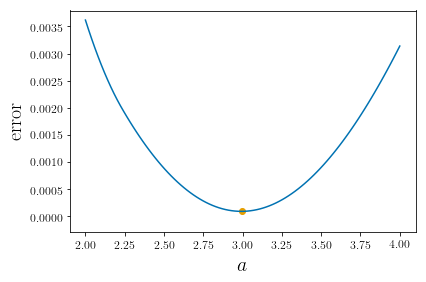

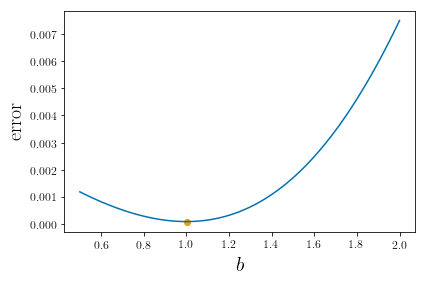

In [19]:
my_model.plot_profiles()

#### Bootstrapping

We use the default 100 repetitions.

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [20]:
%%time
my_model.bootstrap()


              $a$         $b$
count  100.000000  100.000000
mean     2.992944    1.000929
std      0.009656    0.007425
min      2.966975    0.980076
25%      2.987357    0.995199
50%      2.992695    1.000799
75%      2.999655    1.005857
max      3.026677    1.024496
Wall time: 16.5 s


The summary

In [21]:
my_model.bootstrap_summary

,$a$,$b$
count,100.000000,100.000000
mean,2.992944,1.000929
std,0.009656,0.007425
min,2.966975,0.980076
25%,2.987357,0.995199
50%,2.992695,1.000799
75%,2.999655,1.005857
max,3.026677,1.024496


The raw results

In [22]:
my_model.bootstrap_raw

,$a$,$b$
0,3.001569,1.004486
1,2.984817,0.998763
2,2.995861,1.003606
3,2.992901,1.004696
4,2.990429,1.002599
5,3.001521,1.009257
6,2.988546,1.002195
7,3.012022,1.000335
8,2.982343,0.980076
9,3.001928,1.002519


Visualisation

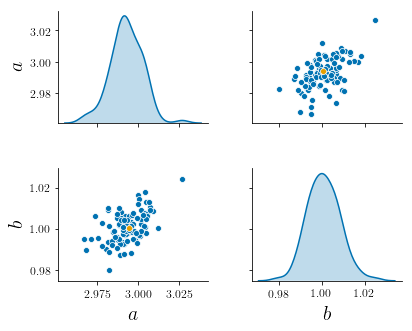

In [23]:
my_model.plot_bootstrap()

### Only one observed variable

Let us suppose now that we only have data for $y$.

In [24]:
df2 = df[df.columns[[0,2]]] # x, which we are ignoring, is column 1 in the data table

df2.head()

,0,2
0,0.060606,0.469672
1,0.060606,0.475169
2,0.060606,0.486987
3,0.070707,0.492719
4,0.070707,0.470383


#### Constructing the `PDEmodel` object.

The inputs are the same as before, except for the data&mdash;now `df2` instead of `df`&mdash;and `obsidx`, which specifies that we only have data for the 2nd variable in the system. Starting from zero, the corresponding index is 1. Since we only have one observed variable, `obsidx` can be either a number or a list of one element.

In [25]:
my_model2 = pde.PDEmodel(df2, LotkaVolterra, [initial_x, initial_y], bounds=[(2, 4), (0.5,2)], 
                         param_names=[r'$a$', r'$b$'], nvars=2, ndims=0, nreplicates=3, obsidx=[1], outfunc=None)

#### Finding the best fit parameters.

In [26]:
%%time
my_model2.fit()

Wall time: 134 ms


In [28]:
my_model2.best_params

,$a$,$b$
0,2.803358,1.034936


In [29]:
my_model2.best_error

9.184988664748587e-05

#### Likelihood profiles

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [30]:
%%time
my_model2.likelihood_profiles()


Wall time: 27.2 s


The raw results

In [31]:
my_model2.result_profiles

,parameter,value,error
0,$a$,2.000000,0.000102
1,$a$,2.020202,0.000102
2,$a$,2.040404,0.000101
3,$a$,2.060606,0.000100
4,$a$,2.080808,0.000100
5,$a$,2.101010,0.000099
6,$a$,2.121212,0.000099
7,$a$,2.141414,0.000098
8,$a$,2.161616,0.000098
9,$a$,2.181818,0.000097


Visualisation

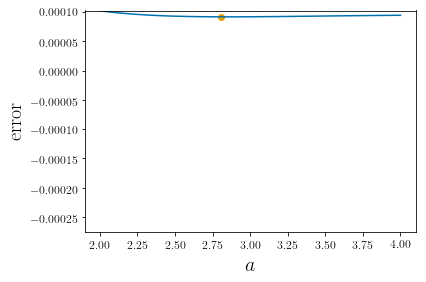

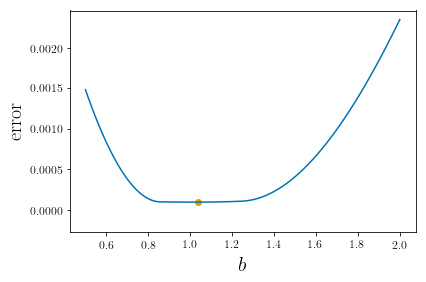

In [32]:
my_model2.plot_profiles()

#### Bootstrapping

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [33]:
%%time
my_model2.bootstrap()


              $a$         $b$
count  100.000000  100.000000
mean     2.977768    1.009821
std      0.445459    0.075360
min      2.415137    0.851782
25%      2.662898    0.973629
50%      2.860727    1.016547
75%      3.171481    1.067136
max      3.999497    1.142363
Wall time: 13.6 s


The summary

In [34]:
my_model2.bootstrap_summary

,$a$,$b$
count,100.000000,100.000000
mean,2.977768,1.009821
std,0.445459,0.075360
min,2.415137,0.851782
25%,2.662898,0.973629
50%,2.860727,1.016547
75%,3.171481,1.067136
max,3.999497,1.142363


The raw results

In [35]:
my_model2.bootstrap_raw

,$a$,$b$
0,2.687783,1.079029
1,3.072799,0.976124
2,2.712503,1.056712
3,3.360885,0.941927
4,3.082563,0.981318
5,2.833902,1.030771
6,2.791522,1.031163
7,3.307862,0.932829
8,3.042364,0.987125
9,3.975437,0.861197


Visualisation

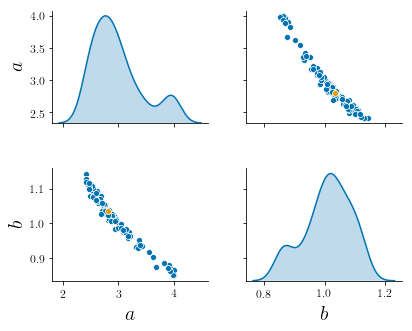

In [36]:
my_model2.plot_bootstrap()

### Only a function of the variables is observed

Finally, we consider the case when it's not the raw outputs of the system that are observed, but rather a function of them. In this case, let us assume that the observed quantity is

$$\mathcal{F}(x, y) = x\,y$$

In [37]:
df3 = df[df.columns[[0]]] # we take only the time-points

# We add the new function
df3[r'$\mathcal{F}$'] = df['1']*df['2'] # x and y are, respectively, columns 1 and 2 in the data table

df3.head()

,0,$\mathcal{F}$
0,0.060606,0.153085
1,0.060606,0.155130
2,0.060606,0.154632
3,0.070707,0.167795
4,0.070707,0.152645


#### Constructing the `PDEmodel` object.

The inputs are the same as before, except for the data&mdash;now `df3`&mdash;and `outfunc`, which specifies the function to be applied to the outputs before computing the error.

In [38]:
def F(z):
    x, y = z
    
    return x*y

In [39]:
my_model3 = pde.PDEmodel(df3, LotkaVolterra, [initial_x, initial_y], bounds=[(2, 4), (0.5,2)], 
                         param_names=[r'$a$', r'$b$'], nvars=2, ndims=0, nreplicates=3, obsidx=None, outfunc=F)

#### Finding the best fit parameters.

In [40]:
%%time
my_model3.fit()

Wall time: 518 ms


In [42]:
my_model3.best_params

,$a$,$b$
0,3.009673,0.960555


In [43]:
my_model3.best_error

4.441665554295942e-05

#### Likelihood profiles

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [44]:
%%time
my_model3.likelihood_profiles()


Wall time: 1min 15s


The raw results

In [45]:
my_model3.result_profiles

,parameter,value,error
0,$a$,2.000000,0.002442
1,$a$,2.020202,0.002340
2,$a$,2.040404,0.002239
3,$a$,2.060606,0.002140
4,$a$,2.080808,0.002043
5,$a$,2.101010,0.001948
6,$a$,2.121212,0.001854
7,$a$,2.141414,0.001763
8,$a$,2.161616,0.001674
9,$a$,2.181818,0.001587


Visualisation

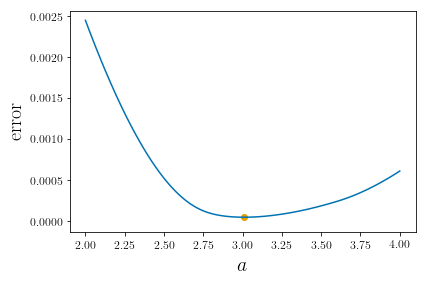

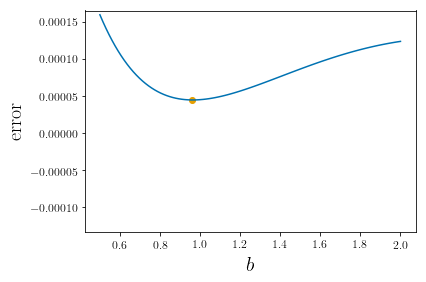

In [46]:
my_model3.plot_profiles()

#### Bootstrapping

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [47]:
%%time
my_model3.bootstrap()


              $a$         $b$
count  100.000000  100.000000
mean     3.011859    0.960814
std      0.018859    0.034380
min      2.965501    0.847701
25%      2.999082    0.939347
50%      3.012902    0.957520
75%      3.021978    0.982019
max      3.074520    1.051070
Wall time: 32.1 s


The summary

In [48]:
my_model3.bootstrap_summary

,$a$,$b$
count,100.000000,100.000000
mean,3.011859,0.960814
std,0.018859,0.034380
min,2.965501,0.847701
25%,2.999082,0.939347
50%,3.012902,0.957520
75%,3.021978,0.982019
max,3.074520,1.051070


The raw results

In [49]:
my_model3.bootstrap_raw

,$a$,$b$
0,2.965501,1.021184
1,3.019963,0.917442
2,3.008105,0.965180
3,3.028917,0.952090
4,2.991706,0.975129
5,3.034819,0.956285
6,3.021607,0.900105
7,3.013795,0.960614
8,3.041457,0.925588
9,3.013842,0.974983


Visualisation

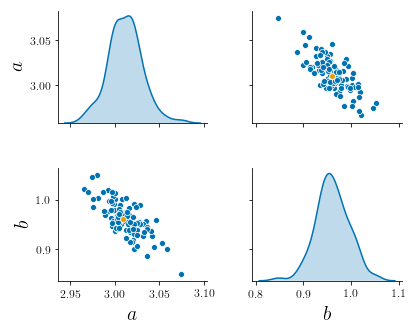

In [50]:
my_model3.plot_bootstrap()